<a href="https://colab.research.google.com/github/Sylver640/ADA-Informes/blob/main/Informe_BellmanFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema (camino más corto)
---
**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e \geq 0$ asociado a cada arco $e\in E$.

**Salida**: La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.

----

Continuando la linea de problemas clásicos en la teoría de grafos, era imposible dejar fuera al conocido **camino más corto**, en este caso con una fuente única. En términos generales, esta versión del problema tiene como objetivo encontrar la **distancia más corta** entre un vértice inicial o fuente $s$ y todos los nodos del grafo dirigido $G = (V, E)$. Definiremos la distancia o largo de un camino como la suma de sus arcos. 

Por ejemplo, en el siguiente grafo, las distancias más cortas entre $s$ y el resto de los nodos son: $distancia(s,s)=0$, $distancia(s,v)=1$, $distancia(s,w)=3$ y $distancia(s,t)=6$.

![image](https://chartreuse-goal-d5c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F9353642d-b383-4a2c-96b0-479eb5240879%2FUntitled.png?table=block&id=0491d913-c844-4de0-a5a4-9b1bfe386320&spaceId=4f8bebe4-a843-44d2-b6ee-51e2006a90d1&width=2000&userId=&cache=v2)

Un algoritmo que logra entregar una solución óptima a esta problemática es el conocido **algoritmo de Dijkstra**, el cual es capaz de encontrar la distancia más corta en grafos con solamente arcos positivos. 

No obstante, esta problemática no se limita a tan solo aplicaciones que sean de esta índole. Por lo tanto, una versión revisada del problema que permita esto tendría las siguientes características:

---

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida**: Una de las siguientes opciones:

1. La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.
2. Una declaración indicando que $G$ contiene un ciclo negativo.

---

Así tenemos el mismo problema, el cual nuevamente tiene el objetivo de encontrar el camino más corto desde una fuente única. Esto sobre grafos dirigidos y con arcos **positivos o negativos**. Sin embargo, con algo más de versatilidad tenemos una limitante, y estos son los llamados **ciclos negativos**, los cuales impiden entregar una correcta solución al problema, puesto que podríamos iterar indefinidamente en este ciclo reduciendo infinitamente el largo del camino. En esta versión del problema, un algoritmo capaz de solucionarlo es el **algoritmo de Bellman-Ford**, el cual trabaja bajo el paradigma de la programación dinámica.

#2. Algoritmos
A continuación, se presentarán las implementaciones de los dos algoritmos mencionados anteriormente: Dijkstra y Bellman-Ford. Para poder trabajar con ellos, se utilizará el generador de instancias propuesto en el siguiente bloque de código, así como también un convertidor de instancias al formato de la librería externa *networkx*, la cual permite ver de forma gráfica cada grafo generado.

In [3]:
import random
import networkx as nx

### Generadores de instancia ###

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator_bellman(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator_bellman(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator_bellman(n)

    return graph, graph[0][0]

def instance_generator_dijkstra(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator_dijkstra(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator_dijkstra(n)

    return graph, graph[0][0]

##Conversión de grafo al formato "networkx"##
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

##2.1 Algoritmo de Dijkstra
También llamado "algoritmo de caminos mínimos", éste fue concebido por el científico en computación Edsger Dijkstra en 1956, y publicado en 1959. Soluciona la primera versión del problema, es decir, solo trabaja con arcos positivos.

In [22]:
from termcolor import cprint
import random

#Función que permite imprimir las distancias en un formato intuitivo.
def imprimirDistancias(G, nodos, distancias):
  print("Distancia de cada vértice desde la fuente:")
  for i in range(len(distancias)):
    print("{0}\t\t{1}".format(i, distancias[i]))

#Función que permite conseguir el vértice con la menor distancia al vértice fuente
#que aún no haya sido revisado.
def minDistance(V, dis, visitado):
  min = 99999999 #Valor cercano a infinito
  min_index = 0 #Índice donde se ubicará el vértice con la menor distancia
  for u in range(V): #Recorremos el grafo
    if dis[u] < min and visitado[u] == False:
      min = dis[u]
      min_index = u
    
  return min_index


def dijkstraAlgorithm(G, s, nodos, verbose, visualize):
    if verbose == True:
      print("------------------")

    if visualize == True:
      G_to_networkx = graph_to_nxdigraph(G, nodos) #Se transforma nuestro grafo a uno compatible con la libreria networkx
      pos=nx.spring_layout(G_to_networkx)
      labels = nx.get_edge_attributes(G_to_networkx,'weight') #Se agregan los pesos a nuestro grafo visual
      #Con ayuda de los comandos proveídos por networkx, mostramos en pantalla el grafo en el que se está trabajando
      nx.draw_networkx_edge_labels(G_to_networkx,pos,edge_labels=labels,font_size=10)
      nx.draw(G_to_networkx, pos, with_labels = True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

    # Inicializa la distancia de cada vértice como infinito.
    dis = [99999999] * nodos
    # Inicializamos la distancia del vértice fuente como 0.
    dis[s] = 0

    if(verbose == True): 
      print(f"Inicializamos la lista de distancias con el valor 99999999, y la posición {s} como 0")
      print(f"{dis}\n")
  
    visitado = [False] * nodos #Lista que almacena en cada posición si un vértice fue visitado o no.

    listaV = [[0] * nodos for v in range(nodos)] 

    for u in range(len(G)):
      listaV[G[u][0]][G[u][1]] = G[u][2]
    
    if(verbose == True): 
      print(f"Creamos una arreglo con cada vértice y sus conexiones.")
      print(f"{listaV}\n")

    if verbose == True: print("Comenzamos a revisar cada nodo...")
    for i in range(nodos):
      if verbose == True: print(f"----- ITERACIÓN {i+1} -----\n")
      #Se elige el vértice con la menor distancia al vértice fuente aún no revisado
      x = minDistance(nodos, dis, visitado)
      if (verbose == True): print(f"El vértice {x} posee la menor distancia desde el vértice fuente. Ahora revisamos sus nodos adyacentes")
      visitado[x] = True #Se deja como revisado

      for y in range(nodos):
        #Si se encuentra un nodo adyacente aún no revisado cuya distancia al vértice fuente es mayor a la distancia entre el
        #nodo elegido y el vértice fuente junto al peso de la conexión x --> y, se actualiza el valor del primero al del segundo.
        if listaV[x][y] > 0 and visitado[y] == False and dis[y] > dis[x] + listaV[x][y]:
           if(verbose == True): print(f"Existe una conexión desde {x} a {y} no revisada y la distancia desde {s} a {y} ({dis[y]}) es mayor a \nla distancia desde {s} a {x} ({dis[x]}) + y el arco {x} -> {y} ({listaV[x][y]})")
           dis[y] = dis[x] + listaV[x][y]
           if(verbose == True): 
             print(f"El nuevo valor de la distancia del vértice fuente hacia {y} es {dis[y]}")
             print(dis)
        else:
          if(verbose == True and listaV[x][y] == 0): print(f"No existe una conexión desde {x} a {y}")
          if(verbose == True and visitado[y] == True): print(f"Existe una conexión desde {x} a {y} ya revisada")
          if(verbose == True and dis[y] < dis[x] + listaV[x][y]): print(f"La distancia desde {s} a {y} ({dis[y]}) es menor o igual a la distancia desde {s} a {x} ({dis[x]}) + y el arco {x} -> {y} ({listaV[x][y]})")
      if verbose == True: print("\n----------")
    
    if verbose == True:
      print("Finalmente, retornamos la siguiente lista que contiene las distancias más cortas para cada nodo desde el vértice fuente: ")
      print(dis)
      print("------------------")
    return dis #Retornamos la lista que contiene las distancias más cortas para cada nodo desde el vértice fuente


#Ejemplo
n_dijkstra = random.randint(5,25)
G_dijkstra, fuente_dijkstra = instance_generator_dijkstra(n_dijkstra)
print(f"Dijkstra: {G_dijkstra}")
print(f"Fuente: {fuente_dijkstra}")

distancias = dijkstraAlgorithm(G_dijkstra, fuente_dijkstra, n_dijkstra, verbose = False, visualize = False)

imprimirDistancias(G_dijkstra, n_dijkstra, distancias)

Dijkstra: [(12, 11, 34), (12, 14, 72), (12, 0, 83), (3, 8, 53), (10, 5, 27), (14, 5, 29), (1, 4, 64), (1, 12, 39), (2, 12, 10), (2, 7, 19), (6, 12, 95), (6, 13, 88), (6, 3, 81), (5, 13, 21), (9, 7, 81), (9, 0, 3), (9, 13, 10), (13, 12, 90), (13, 2, 91), (4, 2, 5), (4, 5, 5), (7, 8, 31), (7, 3, 75), (7, 6, 36), (0, 6, 43), (0, 3, 22), (11, 7, 13), (2, 1, 14), (1, 9, 81), (2, 10, 83)]
Fuente: 12
Distancia de cada vértice desde la fuente:
0		83
1		227
2		213
3		105
4		291
5		101
6		83
7		47
8		78
9		308
10		296
11		34
12		0
13		122
14		72


###2.1.1 Descripción del algoritmo
El algoritmo recibe un grafo dirigido de arcos positivos $G = (V, E)$ y un vértice fuente $s \in V$, y retorna una lista con la distancia más corta entre $s$ y cada uno de los demás vértices del grafo. Cabe notar que este algoritmo posee un enfoque **greedy**, en el sentido que siempre buscará la mejor solución en cada iteración, con la esperanza de que este camino sea el más corto para todo el problema. En otras palabras, Dijkstra construye una solución paso a paso en base a una regla heurística. En términos generales, el algoritmo implementado funciona de la siguiente manera:
1. Inicializamos el arreglo $dis$, que almacenará la distancia más corta entre el vértice fuente y otro vértice en específico. Cada posición se inicializa con un valor muy cercano a infinito (en este caso $99999999$), con excepción de $dis[s]$, debido a que corresponde al nodo fuente, por lo que se inicializa con $0$.
2. De la misma manera, creamos una lista $visitado$, donde cada una de sus posiciones mostrará si el nodo ha sido visitado o no; y otra que almacenará cada vértice y sus respectivas conexiones.
3. Luego, dentro de un ciclo anidado, revisamos cada nodo. En cada iteración del primer `for` primero buscamos la distancia mínima entre éste ($dis[x]$) y el nodo fuente. Lo marcamos como visitado dentro de la lista correspondiente, y así, dentro del ciclo anidado, visitamos cada uno de sus nodos adyacentes que aún **no hayan sido visitados** ($dis[y]$). Allí, mientras esta condición se cumpla, se analizará si es que la distancia entre $s$ y este nodo es mayor a $dis[x] + listaV[x][y]$. En aquel caso, entonces $dis[y]$ será igual a este valor, es decir, sería la nueva distancia más corta encontrada entre $s$ e $y$.
4. Finalmente, retornamos la lista $dis$ que almacena cada distancia más corta.

###2.1.2 Ejemplo
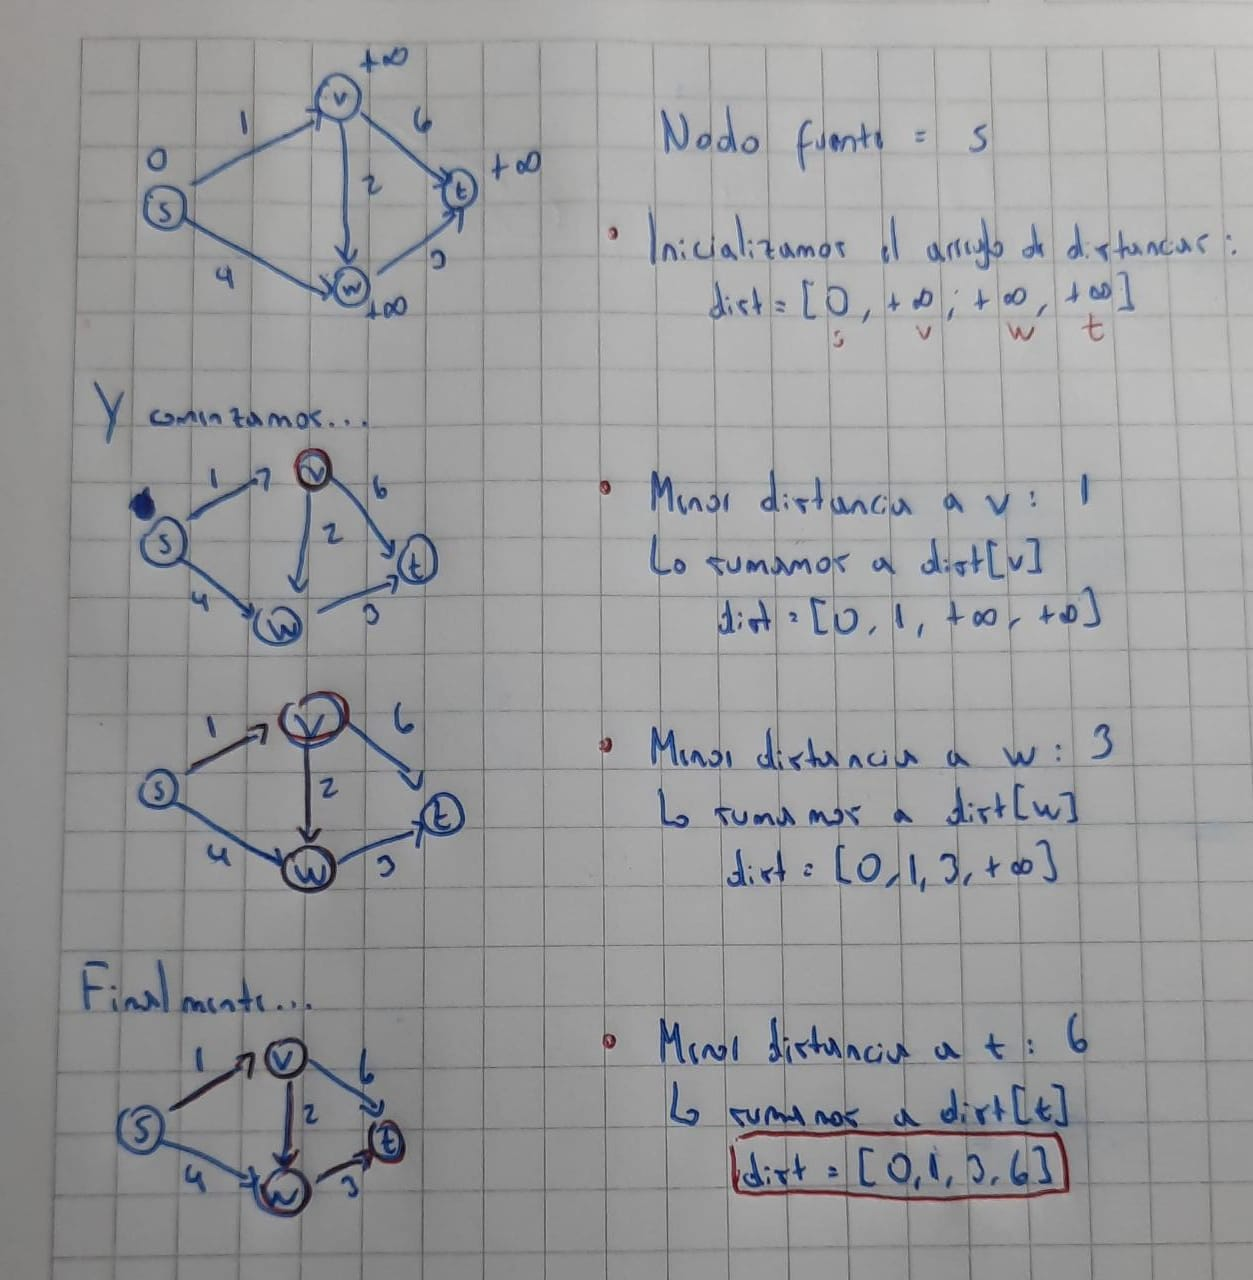

###2.1.3 Visualización del grafo a trabajar
Al determinar que `visualize` sea igual a `True`, se mostrará en pantalla de forma gráfica el grafo en el que se está trabajando. Como ayuda, utilizamos la librería externa **networkx**. A continuación se muestra lo especificado:

Grafo de entrada: [(6, 5, 90), (6, 2, 45), (1, 3, 4), (1, 6, 7), (1, 0, 6), (5, 4, 84), (2, 5, 46), (2, 0, 11), (0, 3, 84), (3, 2, 5), (4, 1, 94)]
Número de nodos: 7
Fuente: 6


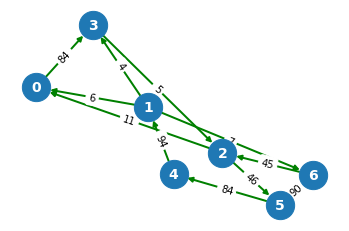

In [ ]:
n_dijkstra = random.randint(5,10)
G_dijkstra, fuente_dijkstra = instance_generator_dijkstra(n_dijkstra)
cprint(f"Grafo de entrada: {G_dijkstra}", 'yellow', attrs=["bold"])
cprint(f"Número de nodos: {n_dijkstra}")
cprint(f"Fuente: {fuente_dijkstra}", "yellow", attrs=["bold"])

distancias = dijkstraAlgorithm(G_dijkstra, fuente_dijkstra, n_dijkstra, verbose = False, visualize  = True)

###2.1.4 Ejecución del algoritmo paso a paso (`verbose = True`)
Al determinar que `verbose` sea igual a `True` en todas las funciones, al ejecutar el programa mostrarán cómo se realiza todo paso a paso, tal como se ve a continuación:

In [23]:
n_dijkstra = random.randint(5,10)
G_dijkstra, fuente_dijkstra = instance_generator_dijkstra(n_dijkstra)
cprint(f"Grafo de entrada: {G_dijkstra}", 'yellow', attrs=["bold"])
cprint(f"Número de nodos: {n_dijkstra}")
cprint(f"Fuente: {fuente_dijkstra}", "yellow", attrs=["bold"])

distancias = dijkstraAlgorithm(G_dijkstra, fuente_dijkstra, n_dijkstra, verbose = True, visualize  = False)
imprimirDistancias(G_dijkstra, n_dijkstra, distancias)

Grafo de entrada: [(2, 0, 34), (2, 3, 44), (2, 4, 89), (1, 2, 49), (1, 5, 80), (6, 2, 85), (6, 1, 67), (6, 4, 12), (3, 5, 20), (3, 0, 72), (3, 4, 55), (4, 1, 23), (4, 0, 56), (5, 0, 64), (5, 2, 72), (5, 6, 28)]
Número de nodos: 7
Fuente: 2
------------------
Inicializamos la lista de distancias con el valor 99999999, y la posición 2 como 0
[99999999, 99999999, 0, 99999999, 99999999, 99999999, 99999999]

Creamos una arreglo con cada vértice y sus conexiones.
[[0, 0, 0, 0, 0, 0, 0], [0, 0, 49, 0, 0, 80, 0], [34, 0, 0, 44, 89, 0, 0], [72, 0, 0, 0, 55, 20, 0], [56, 23, 0, 0, 0, 0, 0], [64, 0, 72, 0, 0, 0, 28], [0, 67, 85, 0, 12, 0, 0]]

Comenzamos a revisar cada nodo...
----- ITERACIÓN 1 -----

El vértice 2 posee la menor distancia desde el vértice fuente. Ahora revisamos sus nodos adyacentes
Existe una conexión desde 2 a 0 no revisada y la distancia desde 2 a 0 (99999999) es mayor a 
la distancia desde 2 a 2 (0) + y el arco 2 -> 0 (34)
El nuevo valor de la distancia del vértice fuente hac

##2.2 Algoritmo de Bellman-Ford

In [8]:
from termcolor import cprint

#Función que permite imprimir las distancias en un formato intuitivo
def imprimirDistancias(G, nodos, distancias):
  print("Distancia de cada vértice desde la fuente:")
  for i in range(len(distancias)):
    print("{0}\t\t{1}".format(i, distancias[i]))

def bellmanFordAlgorithm(G, s, nodos, verbose, visualize):
  if verbose == True: print("--------------------")
  #Inicializamos el arreglo con un número cercano al infinito positivo
  distancias = [99999999] * nodos
  distancias[s] = 0 #Puesto que es el origen, se inicializa la distancia de s como 0
  if verbose == True: print(f"Se inicializa la lista de distancias: {distancias}")

  if visualize == True:
    G_to_networkx = graph_to_nxdigraph(G, nodos) #Se transforma nuestro grafo a uno compatible con la libreria networkx
    pos=nx.spring_layout(G_to_networkx)
    labels = nx.get_edge_attributes(G_to_networkx,'weight') #Se agregan los pesos a nuestro grafo visual
    #Con ayuda de los comandos proveídos por networkx, mostramos en pantalla el grafo en el que se está trabajando
    nx.draw_networkx_edge_labels(G_to_networkx,pos,edge_labels=labels,font_size=10)
    nx.draw(G_to_networkx, pos, with_labels = True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

  #Recorremos cada uno de los arcos (nodos-1) veces, lo que nos permite entregar una solución más completa que verifica cada nodo restante desde la fuente
  if verbose == True: print("\nComenzamos a recorrer todos los arcos del grafo...")
  for i in range(nodos-1):
    if verbose == True: 
      print(f"\nIteración {i+1}")
      print("Recorremos el grafo")
    for u, v, w in G: #Se recorre el grafo
      if verbose == True: print(f"Se analiza la conexión [{u},{v},{w}]")
      #Si esto se cumple, distancias[v] guardará el camino más corto posible entre el vértice fuente y el nodo indicado
      if distancias[u] != 99999999 and distancias[u] + w < distancias[v]:
        distancias[v] = distancias[u] + w
        if verbose == True: print(f"Nuevo camino más corto entre {s} y {v}! --> {distancias[v]}")
  
  #Luego, se chequea la existencia de ciclos negativos. Si se obtiene un camino más corto a alguno de
  #los calculados anteriormente, retornamos una lista vacía.

  if verbose == True: print("\nAhora se buscan ciclos negativos...")
  for u, v, w in G:
    if distancias[u] != 99999999 and distancias[u] + w < distancias[v]:
      if verbose == True: print(f"Oh no! Se ha encontrado un ciclo negativo. Se retorna la lista {[]}")
      print("CICLO NEGATIVO!")
      if verbose == True: print("--------------------")
      return []

  if verbose == True:
    print("\nNo se ha encontrado ningún ciclo negativo. Retornamos la lista de distancias!") 
    print("--------------------")
  return distancias #Finalmente, se retorna la lista que contiene los caminos más cortos desde el vértice fuente
                    #hasta cada uno de los nodos restantes del grafo

#Ejemplo
n_bellman = random.randint(5,25)
G_bellman, fuente_bellman = instance_generator_bellman(n_bellman)

cprint(f"Grafo de entrada: {G_bellman}", 'yellow', attrs=["bold"])
cprint(f"Número de nodos: {n_bellman}")
cprint(f"Fuente: {fuente_bellman}", "yellow", attrs=["bold"])

distancias = bellmanFordAlgorithm(G_bellman, fuente_bellman, n_bellman, verbose = False, visualize  = False)

if (distancias != []): imprimirDistancias(G_bellman, n_bellman, distancias)

Grafo de entrada: [(21, 19, 89), (0, 7, -19), (0, 2, 32), (12, 4, 89), (11, 3, 77), (11, 18, 69), (11, 3, 93), (3, 19, 97), (3, 20, 52), (3, 6, 37), (19, 9, 22), (19, 20, 47), (19, 6, 99), (22, 9, 98), (22, 16, 8), (22, 8, 38), (17, 18, 17), (17, 22, 28), (2, 16, 78), (5, 19, 62), (7, 19, 29), (7, 15, 75), (7, 12, 87), (16, 12, 15), (16, 1, 29), (9, 1, 43), (9, 16, 73), (10, 12, 89), (18, 21, 49), (18, 16, 74), (18, 7, 19), (20, 11, 16), (20, 16, 54), (20, 5, 21), (4, 0, 63), (15, 11, 85), (14, 17, 24), (14, 5, 40), (14, 12, 96), (8, 7, 18), (8, 11, 65), (8, 5, 4), (1, 7, 29), (1, 15, 28), (1, 6, 4), (6, 11, 16), (6, 8, 37), (13, 1, 18), (13, 15, 31), (11, 10, 93), (16, 14, 76), (18, 13, 46)]
Número de nodos: 23
Fuente: 21
Distancia de cada vértice desde la fuente:
0		351
1		154
2		383
3		229
4		288
5		157
6		158
7		183
8		195
9		111
10		245
11		152
12		199
13		267
14		260
15		182
16		184
17		284
18		221
19		89
20		136
21		0
22		312


###2.2.1 Descripción del algoritmo
Este algoritmo recibe un grafo dirigido $G = (V,E)$ que puede poseer arcos negativos, un vértice fuente $s \in V$ y la cantidad de nodos $V$. Al realizar el proceso, éste puede retornar alguna de estas dos salidas:
1. Si no se encuentran ciclos negativos en el grafo, se retorna una lista con la distancia más corta entre $s$ y cada uno de los demás vértices del grafo.
2. En el caso contrario, se retorna una lista vacía y se muestra un mensaje en pantalla indicando la presencia de un ciclo negativo en $G$.

Cabe notar que Bellman-Ford trabaja bajo el paradigma de **programación dinámica**, por lo tanto será necesario definir su subestructura óptima, y en consecuencia su función de recurrencia, lo cual hace posible su implementación bottom-up.

###**Subestructura óptima:**
En términos generales, deseamos encontrar la ruta óptima $P$ considerando $i$ arcos o menos, puesto que no sabemos la cantidad específica de arcos de la ruta óptima. Si definimos esto, pueden ocurrir dos situaciones:
1. La ruta más corta tiene $i-1$ arcos o menos, por lo que tan solo bastaría con encontrar ésta.
2. La ruta más corta posee efectivamente $i$ arcos, por lo que se realiza la subdivisión de problemas especificada en la siguiente imagen.
![image](https://chartreuse-goal-d5c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Ffddd9b5c-071a-4413-8f7d-229ad407e880%2FUntitled.png?table=block&id=e9d843f8-abec-4773-925d-3e254110810d&spaceId=4f8bebe4-a843-44d2-b6ee-51e2006a90d1&width=2000&userId=&cache=v2)

Como se puede observar, la ruta más corta $P$ se puede obtener calculando las rutas más cortas $P'$ entre $s$ y un nodo intermedio $w$, limitada a $i-1$ arcos. Luego, tan solo sumamos la distancia entre $w$ y $v$, lo cual se espera nos deje con la mejor alternativa. Por lo tanto, y viendo como es que la cantidad máxima de arcos para una ruta más corta es de $n-1$, para obtener la mejor solución al problema original debemos encontrar la ruta más corta con $i = n-1$.

Así, básandonos en este análisis previo, llegamos al siguiente lema que definirá nuestra subestructura óptima:

*Sea $G=(V,E)$ un grafo dirigido con largo de arcos reales y una fuente $s \in V$. Suponiendo que $i \geq 1$ y $v\in V$, y sea $P$ la ruta más corta $s \leadsto v$ en $G$ con $i$ arcos o menos. Entonces, una de las dos afirmaciones siguientes es verdadera:*

- *$P$ es la ruta más corta con $i-1$ arcos o menos.*
- *$P$ es, para algún valor $w \in V$, la ruta más corta $s\leadsto w$ con $i-1$ arcos o menos, adicionada con el arco $(w,v) \in E$.*

Finalmente, como consecuencia de estos subproblemas, es posible definir nuestra **función de recurrencia**, donde consideramos a $L_{i,v}$ como el largo mínimo de un camino $s\leadsto v$ con a lo más $i-1$ arcos y ciclos permitidos. Luego, para todo $i\geq 1$ y $v \in V$ tenemos que:

$L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(caso 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(caso 2)}
    	\end{array}
\right\}$

Siendo los **subproblemas base**, para todo $v \in V$, los siguientes:
$L_{0,v} =
\left\{
\begin{array}{cc}
0 & \text{si $$s=v$$} \\
+\infty & \text{en otro caso.}
\end{array}
\right.$

Por lo tanto, y luego de comprender la construcción del algoritmo de Bellman-Ford en base a esta subestructura óptima, construimos nuestro algoritmo con implementación bottom-up, el cual en términos generales funciona de la siguiente manera:
1. Se crea la lista $distancias$, la cual contendrá cada distancia desde el vértice fuente hacia los nodos restantes. Cada posición, con excepción de la posición $s$, se inicializan con el valor $99999999$, mientras que la mencionada contiene el valor $0$, que simboliza la distancia nula desde $s$ hasta sí mismo.
2. Luego, en un ciclo `for` que recorre todo el grafo $G$ hasta $nodos-1$ veces, se analiza cada conexión $[u, v, w]$, con $u$ un nodo y $v$ otro, además de $w$ como el peso del arco entre ambos, donde se toma uno de los siguientes caminos: si $distancias[u] + w$ es menor a $distancias[v]$, ahora esta última posición almacenará el nuevo camino más corto; si esto no sucede, tan solo avanzamos al siguiente nodo, sabiendo que $distancias[v]$ almacenará la solución óptima hasta esa iteración.
3. Al finalizar el ciclo anterior, se chequea la presencia de ciclos negativos con ayuda de otro `for`, en donde por cada nodo del grafo $G$ se observa si $distancias[v]$ es mayor a $distancias[u] + w$. Si esto sucede, efectivamente se ha encontrado uno de éstos, por lo que se retorna una lista vacía y se imprime en pantalla el mensaje *CICLO NEGATIVO!*.
4. Finalmente, y tras verificar la no existencia de este fenómeno en el grafo, se retorna la lista $distancias$.

![image](https://upload.wikimedia.org/wikipedia/commons/7/77/Bellman%E2%80%93Ford_algorithm_example.gif?20220707105220)

###2.2.2 Ejemplo

###2.2.3 Visualización del grafo a trabajar
Al determinar que `visualize` sea igual a `True`, se mostrará en pantalla de forma gráfica el grafo en el que se está trabajando. Como ayuda, utilizamos la librería externa **networkx**. A continuación se muestra lo especificado:

Grafo de entrada: [(1, 2, -4), (1, 0, 55), (1, 4, 52), (3, 1, 78), (3, 5, 27), (3, 0, 96), (0, 5, 69), (0, 4, 12), (2, 0, 89), (2, 4, 75), (4, 3, 26), (5, 2, 87), (5, 2, 29)]
Número de nodos: 6
Fuente: 1
Distancia de cada vértice desde la fuente:
0		55
1		0
2		-4
3		78
4		52
5		105


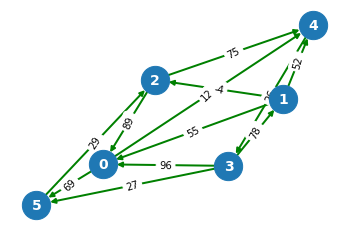

In [ ]:
n_bellman = random.randint(5,10)
G_bellman, fuente_bellman = instance_generator_bellman(n_bellman)
cprint(f"Grafo de entrada: {G_bellman}", 'yellow', attrs=["bold"])
cprint(f"Número de nodos: {n_bellman}")
cprint(f"Fuente: {fuente_bellman}", "yellow", attrs=["bold"])

distancias = bellmanFordAlgorithm(G_bellman, fuente_bellman, n_bellman, verbose = False, visualize  = True)
if (distancias != []): imprimirDistancias(G_bellman, n_bellman, distancias)

###2.2.4 Ejecución del algoritmo paso a paso (`verbose = True`)
Al determinar que `verbose` sea igual a `True` en todas las funciones, al ejecutar el programa mostrarán cómo se realiza todo paso a paso, tal como se ve a continuación:

In [9]:
n_bellman = random.randint(5,10)
G_bellman, fuente_bellman = instance_generator_bellman(n_bellman)
cprint(f"Grafo de entrada: {G_bellman}", 'yellow', attrs=["bold"])
cprint(f"Número de nodos: {n_bellman}")
cprint(f"Fuente: {fuente_bellman}", "yellow", attrs=["bold"])

distancias = bellmanFordAlgorithm(G_bellman, fuente_bellman, n_bellman, verbose = True, visualize  = False)
if (distancias != []): imprimirDistancias(G_bellman, n_bellman, distancias)

Grafo de entrada: [(0, 4, 79), (0, 5, 68), (0, 2, 24), (3, 5, 89), (1, 0, 58), (1, 3, 31), (1, 2, 82), (5, 4, 60), (5, 2, 82), (4, 1, -21), (2, 4, 67)]
Número de nodos: 6
Fuente: 0
--------------------
Se inicializa la lista de distancias: [0, 99999999, 99999999, 99999999, 99999999, 99999999]

Comenzamos a recorrer todos los arcos del grafo...

Iteración 1
Recorremos el grafo
Se analiza la conexión [0,4,79]
Nuevo camino más corto entre 0 y 4! --> 79
Se analiza la conexión [0,5,68]
Nuevo camino más corto entre 0 y 5! --> 68
Se analiza la conexión [0,2,24]
Nuevo camino más corto entre 0 y 2! --> 24
Se analiza la conexión [3,5,89]
Se analiza la conexión [1,0,58]
Se analiza la conexión [1,3,31]
Se analiza la conexión [1,2,82]
Se analiza la conexión [5,4,60]
Se analiza la conexión [5,2,82]
Se analiza la conexión [4,1,-21]
Nuevo camino más corto entre 0 y 1! --> 58
Se analiza la conexión [2,4,67]

Iteración 2
Recorremos el grafo
Se analiza la conexión [0,4,79]
Se analiza la conexión [0,5,68]

#3. Correctitud del algoritmo de Bellman-Ford

##3.1 Teorema
>*El algoritmo de Bellman-Ford recibe un grafo dirigido de $n$ nodos y un vértice fuente $s$, y posee dos salidas:*
1. *Retorna la lista de distancias o caminos más cortos entre el vértice fuente y los demás nodos del grafo.*
2. *En caso de encontrar un ciclo negativo, retorna una lista vacía e imprime en pantalla un mensaje señalando aquello.*

##3.2 Prueba del teorema
En este caso, el teorema correspondiente al algoritmo estudiado será corroborado por medio de **inducción matemática**, donde tendremos una declaración o hipótesis $P(n)$.

**Hipótesis:** Bellman-Ford, luego de $i$ iteraciones del primer ciclo $for$, genera la lista $distancias$, donde si $distancias[u]$ no es $99999999$ (al cual llamaremos un número cercano al infinito positivo), éste es igual al largo de un camino entre $s$ y $u$; y si existe un camino entre estos dos nodos con a lo más $i$ arcos, entonces $distancias[u]$ contiene a lo más el largo del camino más corto desde $s$ hasta $u$.

**Caso base ($i = 0$):** Tenemos que, antes de la primera iteración del ciclo `for`, lo siguiente:
* La distancia del nodo $s$ a sí mismo ($distancias[s]$) es igual a 0, lo cual es correcto.
* Para los vértices restantes $u$, la distancia desde $s$ a cada uno de ellos es igual a un número cercano al infinito positivo, que también es correcto puesto que no existen caminos desde $s$ hasta $u$ con 0 arcos.

**Caso inductivo ($m < i - 1$):** Luego de comprobar que el caso base es correcto, procedemos a comprobar los subproblemas que le siguen. En este caso, el algoritmo estudiado durante las siguientes iteraciones realiza el siguiente análisis con cada conexión $[u, v, w]$ del grafo:
1. Si $distancias[u] + w$ es menor a $distancias[v]$, se asegura que en $distancias[v]$ se almacena la ruta más corta desde $s$ hasta $v$ en ese momento, lo que mantendría la consistencia de la naturaleza del arreglo.
2. Si lo anterior no sucede, simplemente $distancias[v]$ no tendrá cambios, puesto que guiándonos por lo anterior siempre almacenará la distancia que posee el camino más corto desde $s$ hasta $v$.

Luego de comprobar que ambos casos son correctos, observamos como efectivamente la lista $distancias$ almacenará en cada posición la ruta más corta entre el vértice fuente $s$ y un nodo arbitrario $u$. Esto fue posible mediante el análisis de la subestructura óptima del problema. Así, entonces podemos concluir que el algoritmo de Bellman-Ford es **correcto**.

#4. Tiempo de ejecución

##4.1 Teorema (Algoritmo de Dijkstra)
El algoritmo de Dijkstra, que maneja grafos dirigidos, tendrá en el peor y mejor caso un tiempo de ejecución de $O(V^2)$, con $V$ el número de vértices.

##Prueba del teorema
Para probar nuestro teorema, tan solo hará falta analizar con detención nuestro código propuesto anteriormente, el cual hace lo siguiente:
* El primer paso más importante es el encontrar el vértice no visitado que tenga el camino más corto desde el nodo fuente, lo cual requiere un tiempo de $O(V)$.
* Luego, para cada vértice, debemos aplicar el método de "relajación" para cada uno de sus nodos adyacentes, es decir, actualizar cada una de sus distancias al valor más pequeño entre su distancia actual y la nueva que se ha encontrado. Esto tan solo toma un tiempo $O(1)$. No obstante, hay que notar que cada vértice tiene al menos $V-1$ nodos adyacentes, por lo que en realidad el tiempo que tomaría este proceso sería de $O(V) * O(1) = O(V)$.

Por lo tanto, finalmente tenemos la siguiente ecuación:

$O(V) + O(V) + O(V^2)$

Que nos da como resultado que, efectivamente, el tiempo de ejecución en el mejor y peor caso del algoritmo de Dijkstra es de $O(V^2)$.

##4.2 Teorema (Algoritmo de Bellman-Ford)
El algoritmo de Bellman-Ford tendrá en el peor caso un tiempo de ejecución de $O(V^3)$, mientras que su caso promedio es $O(V*E)$, donde $V$ simboliza el número de vértices del grafo y $E$ su número de arcos.

##Prueba del teorema
En el caso del peor caso, este sucede siempre que nos topemos con un ciclo negativo, tal como sucede en el siguiente ejemplo:

![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Bellman%20Ford%20Algorithm/worst-case-bellman-ford-algorithm.png)

En un grafo completo con arcos entre cada par de vértices, y asumiendo que se encuentra el camino más corto en las primeras iteraciones pero aún siguiendo con el llamado proceso de "relajación", que consiste en aquella comparación de distancias para encontrar el camino más corto, éste se debería realizar $V-1$ veces. Así, el peor caso, considerando un grafo completo, tiene un tiempo de ejecución de:

$O(V^2) = O(E*V) * O(V) = O(V^3)$

Por otra parte, para comprobar si el teorema para el caso promedio es correcto, podemos analizar detenidamente el algoritmo implementado, el cual hace lo siguiente:
* Inicializamos el arreglo de distancias con un número cercano a infinito, lo que tomará $O(V)$. Además, hacemos que la posición correspondiente a la fuente sea igual a 0, lo que toma un tiempo $O(1)$.
* Procedemos luego a la relajación, lo que ocurrirá $|V|-1$ veces por cada $E$ número de arcos, por lo que si multiplicamos ambos obtendremos que durante este paso se tomará un tiempo $O(V*E)$.
* Finalmente, comprobamos la presencia de ciclos negativos, que en este caso se hace recorriendo cada conexión del grafo, por lo que se tomará un tiempo $O(E)$.

Por lo tanto, luego de este análisis, podemos efectivamente observar como es que el tiempo de ejecución en un caso promedio es de $O(V*E)$. Esto además se puede corroborar con el método que administra la programación dinámica, puesto que, en nuestro caso, debemos resolver $V$ subproblemas.

#5. Experimentos

##5.1 Media del tiempo del algoritmo de Bellman-Ford
En el siguiente experimento, se evaluará la media del tiempo entre 25 instancias del algoritmo estudiado, esto en cada $n$ tamaño de entrada. Esto se realizará para grafos entre 5 y 25 nodos.

CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NEGATIVO!
CICLO NE

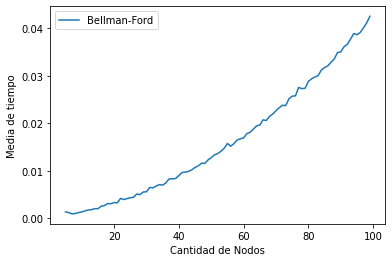

In [18]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

def bellmanRepetido(n):
  G, fuente = instance_generator_bellman(n)
  dist = bellmanFordAlgorithm(G,fuente,n,verbose=False,visualize=False)

x=[]; y=[]
for n in range(5,100):
  z = repeat(setup="from __main__ import bellmanRepetido", stmt=f"bellmanRepetido({n})", repeat=25, number=10)
  sum = 0
  for i in range(len(z)):
    sum += z[i]
  prom = sum/25
  x.append(n)
  y.append(prom)

plt.plot(x,y)
plt.legend(["Bellman-Ford"])

plt.xlabel('Cantidad de Nodos')
plt.ylabel('Media de tiempo')
plt.show()

###Análisis de resultados
Tal como se puede ver en el gráfico, el resultado se asemeja bastante al tiempo teórico estipulado anteriormente, el cual corresponde a $O(V*E)$. Sin embargo, un detalle interesante es que la gráfica muestra un comportamiento similar a lo que veríamos en una de $n*\log(n)$, lo que en realidad podría demostrar que calcular la media entre 25 ejecuciones del algoritmo efectivamente resulta en esto. Como es usual, los diferentes *peaks* que se pueden observar pueden corresponder a inestabilidad en el hardware, además de ser una causa de la aleatoridad con la cual estamos poniendo a prueba nuestro algoritmo. Además, debido a la naturaleza de nuestra implementación, es normal observar como previo a mostrar el gráfico se imprime múltiples veces el mensaje en caso de encontrarse un ciclo negativo en el grafo.

##5.2 Comparación entre los tiempos de ejecución de Bellman-Ford y Dijkstra

Como segundo experimento, se compararán de forma gráfica los tiempos de ejecución de ambos algoritmos estudiados que resuelven el problema del camino más corto y se describirán los resultados entregados. Se utilizarán grafos de $n$ nodos, con $n$ en el rango $[5,50]$.

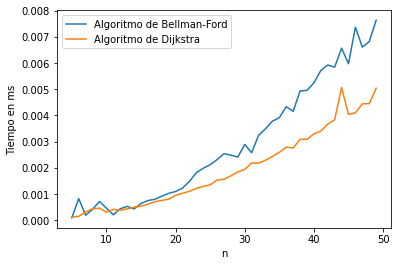

In [26]:
import random
import datetime
from timeit import repeat

x = []; y1 = []; y2 = []
verbose = False
visualize = False

for n in range(5, 50):
  graph_bellman, src_bellman = instance_generator_bellman(n)
  graph_dijkstra, src_dijkstra = instance_generator_dijkstra(n)

  r = repeat(setup="from __main__ import bellmanFordAlgorithm", stmt = f"bellmanFordAlgorithm({graph_bellman}, {src_bellman}, {n}, {verbose}, {visualize})", repeat=1, number=10)
  y1.append(r)

  t = repeat(setup="from __main__ import dijkstraAlgorithm", stmt = f"dijkstraAlgorithm({graph_dijkstra}, {src_dijkstra}, {n}, {verbose}, {visualize})", repeat=1, number=10)
  y2.append(t)

  x.append(n)

plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["Algoritmo de Bellman-Ford", "Algoritmo de Dijkstra"])

plt.xlabel("n")
plt.ylabel("Tiempo en ms")
plt.show()

###Análisis de resultados
Como se puede observar en el gráfico, el algoritmo de Bellman-Ford, si bien es más versátil con respecto a los arcos negativos, tarda más tiempo en ejecutarse en comparación al algoritmo de Dijkstra. No obstante, cabe notar que esto sucede desde aproximadamente $n=20$, puesto que en grafos de menor tamaño ambos algoritmos casi funcionan a la par en cuanto a tiempo nos referimos. Una de las razones para esta diferencia la podemos observar al considerar los tiempos de ejecución teóricos de cada uno. Por un lado tenemos a Bellman-Ford, que en su caso promedio se ejecuta en un tiempo de $O(V*E)$, el cual ya depende de dos variables distintas, mientras que Dijkstra se ejecuta en promedio en $O(V^2)$, es decir, tan solo considerando los nodos. Además, debemos tomar en cuenta que el primero, junto con buscar el camino más corto, también realiza otro ciclo `for` que busca ciclos negativos en el grafo revisado, lo que también un peso importante al momento de la ejecución. Como es usual, se presentan los conocidos *peaks*, cuya posible causa sea inestabilidad en el hardware y la aleatoridad bajo la cual trabaja cada algoritmo durante cada ejecución.